In [413]:
import pandas as pd

读取出租车数据

In [414]:
df = pd.read_csv("data/taxi.csv")

In [415]:
df

,tid,lat,lon,time
0,1,30.624806,104.136604,211846
1,1,30.624809,104.136612,211815
2,1,30.624811,104.136587,212017
3,1,30.624811,104.136596,211916
4,1,30.624811,104.136619,211744
...,...,...,...,...
814175,402,30.744289,104.114530,224538
814176,402,30.744420,104.115429,224619
814177,402,30.744424,104.115416,224609
814178,402,30.744430,104.115384,224559


In [416]:
df["time"].map(lambda x:str(x)[0:2]).astype(int)> 21 

0         False
1         False
2         False
3         False
4         False
          ...  
814175     True
814176     True
814177     True
814178     True
814179     True
Name: time, Length: 814180, dtype: bool

In [417]:
int(str(df["time"])[0:2]) > 20

False

选择时间位于 20:00 至 21:00 直接的行车数据

In [418]:
data = df.loc[ (df["time"].map(lambda x:str(x)[0:4]).astype(int)> 1700) & (df["time"].map(lambda x:str(x)[0:4]).astype(int) <= 1900) ]
data

,tid,lat,lon,time
133,1,30.626503,104.133425,172950
140,1,30.626505,104.133427,173021
144,1,30.626507,104.133427,173051
148,1,30.626509,104.133427,173122
155,1,30.626510,104.133424,173426
...,...,...,...,...
811482,401,30.759476,104.117800,185951
811483,401,30.760573,104.118688,190001
811484,401,30.760981,104.119096,190011
811485,401,30.760982,104.119091,190031


根据出租车id去重， 还剩下384行数据

In [419]:
unique_taxi = data.drop_duplicates(subset=["tid"])
unique_taxi

,tid,lat,lon,time
133,1,30.626503,104.133425,172950
2602,2,30.629086,103.999179,183445
5231,3,30.607516,104.132795,172059
6428,4,30.621599,104.076919,185819
9084,5,30.587247,104.074586,175739
...,...,...,...,...
798864,397,30.566291,103.957865,183420
802544,398,30.649833,104.061894,171844
805544,399,30.650747,104.120522,183539
808245,400,30.627274,103.994137,182823


数据可视化

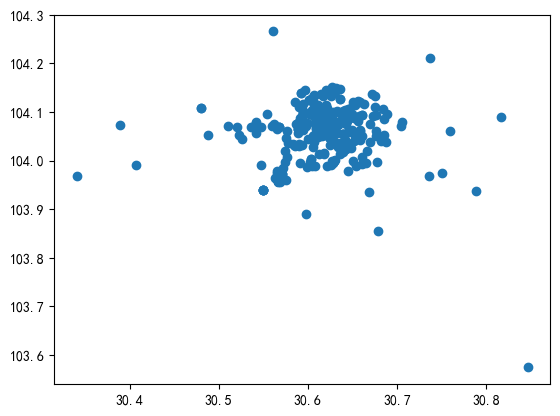

In [420]:
import matplotlib.pyplot as plt
plt.scatter(unique_taxi["lat"], unique_taxi["lon"])

借助DBSCAN聚类取出离群点数据， label值为-1表示该点为离群点

In [421]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(0.01, min_samples=12)
model_dbscan.fit(unique_taxi[["lat","lon"]])
model_dbscan.labels_

array([-1, -1, -1,  0,  5,  0,  1,  2,  3,  0,  2,  0, -1, -1,  0,  4,  2,
        0,  1,  3, -1,  3, -1,  1,  2,  0,  0, -1, -1,  4,  3, -1, -1, -1,
       -1, -1,  1, -1,  3,  4, -1,  3, -1, -1, -1,  3,  0, -1,  2, -1, -1,
        0, -1, -1,  1,  0, -1, -1, -1,  1, -1,  0,  3, -1,  0, -1, -1, -1,
       -1,  1,  0,  1, -1,  5,  3,  5, -1,  5, -1, -1,  1,  3,  1, -1, -1,
       -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,  2,  0,  0,  3,  0,  0, -1,
       -1, -1,  3,  0,  0,  3,  0,  3, -1, -1, -1,  1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2,  0,  3, -1, -1, -1, -1, -1,  0, -1, -1,  3,  1, -1,
        2, -1, -1,  5, -1, -1,  0, -1,  0,  3,  3, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  5,  0,  0, -1,  0, -1,  1, -1,  0,  3,  2,  4,
        4, -1,  3,  3,  3, -1,  0,  2,  0,  0, -1, -1,  1, -1, -1, -1,  0,
        1,  2,  0, -1,  4, -1,  3, -1,  0,  0,  2, -1, -1,  3,  0,  1,  3,
       -1, -1,  5, -1,  3,  1,  3, -1,  3, -1,  2, -1,  2,  5,  1, -1, -1,
        0,  4,  5,  4,  2

可以看到当，取eps=0.013, min_samples=15时，可划分为5类

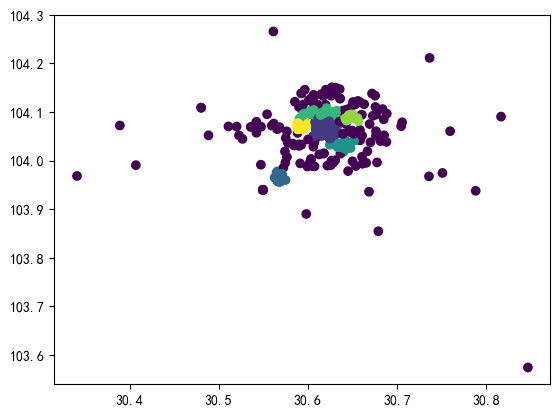

In [422]:
import matplotlib.pyplot as plt
plt.scatter(unique_taxi["lat"], unique_taxi["lon"], c=model_dbscan.labels_)

In [423]:
model_dbscan.labels_

array([-1, -1, -1,  0,  5,  0,  1,  2,  3,  0,  2,  0, -1, -1,  0,  4,  2,
        0,  1,  3, -1,  3, -1,  1,  2,  0,  0, -1, -1,  4,  3, -1, -1, -1,
       -1, -1,  1, -1,  3,  4, -1,  3, -1, -1, -1,  3,  0, -1,  2, -1, -1,
        0, -1, -1,  1,  0, -1, -1, -1,  1, -1,  0,  3, -1,  0, -1, -1, -1,
       -1,  1,  0,  1, -1,  5,  3,  5, -1,  5, -1, -1,  1,  3,  1, -1, -1,
       -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,  2,  0,  0,  3,  0,  0, -1,
       -1, -1,  3,  0,  0,  3,  0,  3, -1, -1, -1,  1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2,  0,  3, -1, -1, -1, -1, -1,  0, -1, -1,  3,  1, -1,
        2, -1, -1,  5, -1, -1,  0, -1,  0,  3,  3, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  5,  0,  0, -1,  0, -1,  1, -1,  0,  3,  2,  4,
        4, -1,  3,  3,  3, -1,  0,  2,  0,  0, -1, -1,  1, -1, -1, -1,  0,
        1,  2,  0, -1,  4, -1,  3, -1,  0,  0,  2, -1, -1,  3,  0,  1,  3,
       -1, -1,  5, -1,  3,  1,  3, -1,  3, -1,  2, -1,  2,  5,  1, -1, -1,
        0,  4,  5,  4,  2

为原始数据增加label列，拼接上他们的类别id

In [424]:
unique_taxi["label"] = model_dbscan.labels_

C:\Users\Qingyuan_Qu\AppData\Local\Temp\ipykernel_19148\2860112448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_taxi["label"] = model_dbscan.labels_


In [425]:
unique_taxi

,tid,lat,lon,time,label
133,1,30.626503,104.133425,172950,-1
2602,2,30.629086,103.999179,183445,-1
5231,3,30.607516,104.132795,172059,-1
6428,4,30.621599,104.076919,185819,0
9084,5,30.587247,104.074586,175739,5
...,...,...,...,...,...
798864,397,30.566291,103.957865,183420,1
802544,398,30.649833,104.061894,171844,-1
805544,399,30.650747,104.120522,183539,-1
808245,400,30.627274,103.994137,182823,-1


筛选掉离群点数据(即label=-1的点)

In [426]:
remove_noise_data = unique_taxi.loc[ unique_taxi["label"]!=-1]

借助KMeans计算聚类中心，指定k=5，聚为5类

In [431]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters = np.unique(model_dbscan.labels_).shape[0]
print(n_clusters)

model = KMeans(n_clusters=n_clusters)
# model = DBSCAN(0.01, min_samples=12)
model.fit_transform(remove_noise_data[["lat","lon"]])
model.cluster_centers_

7


d:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 30.5913212 , 104.07217967],
       [ 30.62066064, 104.05485039],
       [ 30.56798639, 103.96419687],
       [ 30.64220343, 104.09049495],
       [ 30.63870688, 104.03192729],
       [ 30.60834122, 104.09760659],
       [ 30.6181763 , 104.07334987]])

聚类数据可视化

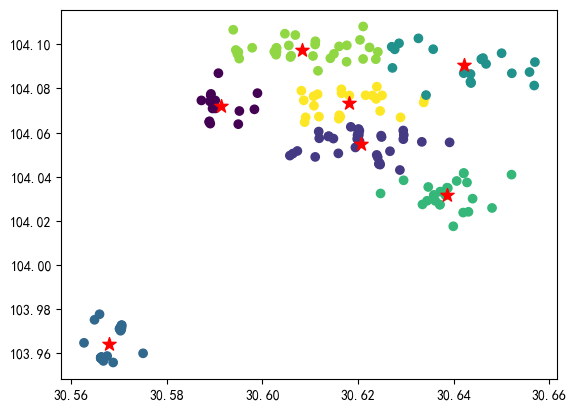

In [432]:
import matplotlib.pyplot as plt
centers = model.cluster_centers_
plt.scatter(remove_noise_data["lat"], remove_noise_data["lon"], c=model.labels_)
plt.scatter(centers[:,0], centers[:,1], marker="*", s=100, color="red")